## EJERCICIOS COMPLEMENTARIOS

### Ejercicio 1.1

Defina una función black_scholes_call() que calcule el precio de una opción de compra europea utilizando la fórmula de Black-Scholes. La función debe tener los siguientes parámetros:


+ 'S': precio actual del activo subyacente
+ 'K': precio de ejercicio de la opción
+ 'r': tasa de interés libre de riesgo
+ 'sigma': volatilidad implícita del activo subyacente
+ 'T': tiempo hasta el vencimiento de la opción (en años)

La fórmula de Black-Scholes para el precio de una opción de compra europea es:

$$C = S * \Phi(d_{1}) - K * e^{(-r*T)} * \Phi(d_{2})$$

donde 
$$d_{1} = (ln(S/K) + (r + 1/2 * \sigma^{2}) * T) / (\sigma * \sqrt{T})$$

$$ d_{2} = d_{1} - \sigma * \sqrt{T}$$

Donde $\Phi$ es la función de distribución acumulativa estándar.

**Pistas** 

```python
from scipy.stats import norm
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
norm.cdf(x) #Phi de x
```

In [ ]:
### Desarrolle aqui el ejercicio

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return option_price


--->

### Ejercicio 1.2

Define una función monte_carlo que calcule el precio de una opción de compra europea utilizando la simulación de Monte Carlo. La función debe tener los siguientes parámetros:

+ S: precio actual del activo subyacente
+ K: precio de ejercicio de la opción
+ r: tasa de interés libre de riesgo
+ sigma: volatilidad implícita del activo subyacente
+ T: tiempo hasta el vencimiento de la opción (en años)
+ N: número de simulaciones de Monte Carlo

Para cada simulación, la función debe generar un número aleatorio $z$ de una distribución normal estándar, y luego calcular el precio del activo subyacente en el vencimiento $S_T$ y el pago de la opción $payoff$. El precio de la opción se calcula como el promedio de todos los pagos, descontado a valor presente por la tasa libre de riesgo.

El precio del activo subyacente se calcula de la siguiente manera:

$$S_{T} = S * e^{(r - 1/2 * \sigma^2) * T + \sigma * \sqrt{T} * z}$$

El payoff lo calculamos como:

$$ payoff = max(S_{T} - K, 0)$$

El precio de la opción se calcula de la siguiente manera:

$$C = e^{-r*T} * \frac{1}{N} \cdot \Sigma_{i=1}^{N}(payoff_{i})$$ 

**Pistas** 

```python
from scipy.stats import norm
def monte_carlo(S, K, r, sigma, T, N):
    """"""
    z=np.random.standard_normal(N)

    return option_price


```

In [ ]:
#Desarrolle aqui su ejercicio

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
from scipy.stats import norm
import numpy as np

# Define function for Monte Carlo simulation
def monte_carlo(S, K, r, sigma, T, N):
    # Generate N random numbers from standard normal distribution
    z = np.random.standard_normal(N)
    # Calculate stock prices at expiration
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
    # Calculate option payoff at expiration
    payoff = np.maximum(ST - K, 0)
    # Discount the payoff back to the present
    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

--->

### Ejercicio 1.3 

Utilizando la función black_scholes_call del Ejercicio 1.1, calcule el precio de una opción de compra europea con los siguientes parámetros:

+ S: 100
+ K: 110
+ r: 0.05
+ sigma: 0.2
+ T: 1

Asigne el resultado a la variable 'option_price' e imprima el resultado

In [ ]:
#Desarrolle aqui su ejercicio

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
# Set parameters
S = 100     # Stock price
K = 110     # Strike price
r = 0.05    # Risk-free interest rate
T = 1       # Time to expiration (in years)
N = 100000  # Number of simulations
sigma=0.2
# Calculate option price using initial guess for volatility
option_price = black_scholes_call(S, K, r, sigma, T)

--->

Ahora utilizaremos el metodo de bisección para encontrar a partir de una sigma_guess evaluada en nuestra funcion_montecarlo() para encontrar la volatilidad implicita, la cual es el valor de sigma que haga nuestra opcion a partir de montecarlo tener el mismo precio que la opcion valorada por black scholes

In [1]:
# Set parameters
S = 100     # Stock price
K = 110     # Strike price
r = 0.05    # Risk-free interest rate
T = 1       # Time to expiration (in years)
N = 100000  # Number of simulations
sigma = 0.2


# Calculate option price 
option_price = black_scholes_call(S, K, r, sigma, T)

# Set tolerance and maximum number of iterations for bisection method
tolerance = 0.0001
max_iterations = 100

# Implement bisection method to find implied volatility
lower_bound = 0.0001
upper_bound = 1.0

for i in range(max_iterations):
    sigma_mid = (lower_bound + upper_bound) / 2
    option_price_mid = monte_carlo(S, K, r, sigma_mid, T, N)
    
    if abs(option_price_mid - option_price) < tolerance:
        break
    
    if option_price_mid > option_price:
        upper_bound = sigma_mid
    else:
        lower_bound = sigma_mid
    
implied_volatility = sigma_mid

# Print the implied volatility
print("Implied volatility:", implied_volatility)


c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Implied volatility: 0.2007788510992068


### Ejercicio 2.1 Optimizacion de portafolios: Media Varianza Teorica

In [2]:
import numpy as np
from scipy.optimize import minimize

# Definir los rendimientos esperados y la matriz de covarianza
returns = np.array([0.1, 0.2, 0.15, 0.12])  # Ejemplo de rendimientos esperados
covariance = np.array([[0.05, 0.02, 0.01, 0.03],
                       [0.02, 0.07, 0.03, 0.04],
                       [0.01, 0.03, 0.06, 0.025],
                       [0.03, 0.04, 0.025, 0.08]])  # Ejemplo de matriz de covarianza

# Definimos las restricciones
volatility_constraint = 0.3  # Maximum allowable portfolio volatility
weights_constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0})  # Sum of weights constraint, eq means equality

# Se define  la función objetivo (retorno promedio negativo para minimización)
def objective_function(weights):
    return -np.dot(weights, returns)

# Definimos la función de restricción para la volatilidad del portafolio
def volatility_constraint_function(weights):
    portfolio_variance = np.dot(weights.T, np.dot(covariance, weights))
    return np.sqrt(portfolio_variance) - volatility_constraint

# Especificamos unos valores iniciales
initial_guess = np.ones(len(returns)) / len(returns)

# Definimos los limites para los pesos de cada activo
bounds = [(0, 1)] * len(returns)

# Resolvemos la optimización
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=[weights_constraint, {'type': 'ineq', 'fun': volatility_constraint_function}])

# Print the optimized results
print("Optimized Weights:", result.x)
print("Optimized Portfolio Return:", -result.fun)
print("Optimized Portfolio Volatility:", np.sqrt(np.dot(result.x.T, np.dot(covariance, result.x))))


Optimized Weights: [1.12598763e-18 1.06929959e-10 2.71702755e-12 1.00000000e+00]
Optimized Portfolio Return: 0.12000000002179353
Optimized Portfolio Volatility: 0.2828427124899814


Veamos un ejercicio con datos reales

In [9]:
#librerias a importar
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime
from scipy.optimize import minimize
yf.pdr_override() 

#Tickers deseados
tickers=["SPY", "AAPL", "MSFT","KO","META","NFLX","WMT"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2023,3,1)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]
retornos_esperados=df_precios.pct_change().dropna().mean().values
cov=df_precios.pct_change().dropna().cov().values
# Definimos las restricciones
volatility_constraint = 2 * yf.download('GOOG', '2012-05-31','2023-03-31')["Close"].pct_change().dropna().std()  # Maximum allowable portfolio volatility
weights_constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0})  # Sum of weights constraint, eq means equality

# Se define  la función objetivo (retorno promedio negativo para minimización)
def objective_function(weights):
    return -np.dot(weights, retornos_esperados)

# Definimos la función de restricción para la volatilidad del portafolio
def volatility_constraint_function(weights):
    portfolio_variance = np.dot(weights.T, np.dot(cov, weights))
    return np.sqrt(portfolio_variance) - volatility_constraint

# Especificamos unos valores iniciales
initial_guess = np.ones(len(retornos_esperados)) / len(retornos_esperados)

# Definimos los limites para los pesos de cada activo
bounds = [(0, 1)] * len(retornos_esperados)

# Resolvemos la optimización
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=[weights_constraint, {'type': 'ineq', 'fun': volatility_constraint_function}])

# Print the optimized results
print("Optimized Weights:", result.x)
print("Optimized Portfolio Return:", -result.fun)
print("Optimized Portfolio Volatility:", np.sqrt(np.dot(result.x.T, np.dot(cov, result.x))))


ImportError: DLL load failed while importing shell: No se encontró el proceso especificado.

In [10]:
!pip uninstall yfinance

### Ejercicio 2.2 Optimizacion de portafolios: Media Varianza Teorica con asset allocation constraints

In [56]:
import numpy as np
from scipy.optimize import minimize

# Define the expected returns and covariance matrix
returns = np.array([0.14, 0.22, 0.15, 0.12])  # Example expected returns
covariance = np.array([[0.05, 0.02, 0.01, 0.03],
                       [0.02, 0.07, 0.03, 0.04],
                       [0.01, 0.03, 0.06, 0.025],
                       [0.03, 0.04, 0.025, 0.08]])  # Example covariance matrix

# Define the constraints
volatility_constraint = 0.3  # Maximum allowable portfolio volatility
allocation_constraint = [ # Equities constraint
                         {'type': 'ineq', 'fun': lambda w: 0.1 - w[:2].sum()},  # Minimum equity constraint
                         {'type': 'ineq', 'fun': lambda w: 0.2 - w[2:].sum()},# Minimum fixed income constraint
                         #{'type': 'eq', 'fun': lambda w: 1 - w[:2].sum() - w[2:].sum()}, # Total sum=1
                         {'type': 'ineq', 'fun': lambda w: w[:2].sum()-0.45 },
                         {'type': 'ineq', 'fun': lambda w: w[2:].sum()-0.55 }]  # Maximum level equity

# Define the objective function (negative mean return for maximization)
def objective_function(weights):
    # Calculate the violation of each constraint
    constraint_violations = np.array([
        max(0, 0.1 - weights[:2].sum()),
        max(0, 0.2 - weights[2:].sum()),
        max(0, weights[:2].sum() - 0.46)
    ])
    # Penalize the violation of constraints in the objective function
    penalty = 1**(-1000)  # Penalty coefficient (you can adjust this value)
    return -np.dot(weights, returns) + penalty * np.sum(constraint_violations)

# Define the constraint function for portfolio volatility
def volatility_constraint_function(weights):
    portfolio_variance = np.dot(weights.T, np.dot(covariance, weights))
    return np.sqrt(portfolio_variance) - volatility_constraint

# Define the initial guess
initial_guess = np.ones(len(returns)) / len(returns)

# Define the bounds for the weights (between 0 and 1)
bounds = [(0, 1)] * len(returns)

# Solve the optimization problem
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=[*allocation_constraint, {'type': 'ineq', 'fun': volatility_constraint_function}])

# Print the optimized results
print("Optimized Weights:", np.round(result.x,3))
print("Optimized Portfolio Return:", -result.fun)
print("Optimized Portfolio Volatility:", np.sqrt(np.dot(result.x.T, np.dot(covariance, result.x))))

# Calculate and print percentage allocation to equities and fixed income
equity_allocation = result.x[:2].sum() * 100
fixed_income_allocation = result.x[2:].sum() * 100
print("Equity Allocation: {:.2f}%".format(equity_allocation))
print("Fixed Income Allocation: {:.2f}%".format(fixed_income_allocation))


Optimized Weights: [0.    0.45  0.178 0.322]
Optimized Portfolio Return: 0.16433798759864368
Optimized Portfolio Volatility: 0.20889400259564528
Equity Allocation: 45.00%
Fixed Income Allocation: 50.00%


### Ejercicio 2.3 Optimizacion de portafolios: Media Varianza Teorica con limites de paises emergentes

In [46]:
import numpy as np
from scipy.optimize import minimize

# Define the expected returns and covariance matrix
returns = np.array([0.08, 0.06, 0.1, 0.07])  # Example expected returns
covariance = np.array([[0.04, 0.01, 0.02, 0.015],
                       [0.01, 0.03, 0.015, 0.01],
                       [0.02, 0.015, 0.06, 0.025],
                       [0.015, 0.01, 0.025, 0.04]])  # Example covariance matrix

# Define the mutual fund composition (emerging, developed percentages)
mutual_funds = [(0.5, 0.5), (0.2, 0.8), (0.7, 0.3), (0.25, 0.75)]  # Example mutual funds composition

# Calculate the global developed country allocation constraint
global_developed_allocation_constraint = {'type': 'ineq', 'fun': lambda w: np.sum([mf[1]*w[i] for i, mf in enumerate(mutual_funds)])-0.5}

# Define the weights constraint (sum of weights equals 1)
weights_constraint = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}

# Define the objective function (negative mean return for maximization)
def objective_function(weights):
    return -np.dot(weights, returns)

# Define the initial guess
initial_guess = np.ones(len(returns)) / len(returns)

# Define the bounds for the weights (between 0 and 1)
bounds = [(0, 1)] * len(returns)

# Solve the optimization problem
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=[global_developed_allocation_constraint, weights_constraint])

# Print the optimized results
print("Optimized Weights:", result.x)
print("Optimized Portfolio Return:", -result.fun)
print("Optimized Portfolio Volatility:", np.sqrt(np.dot(result.x.T, np.dot(covariance, result.x))))

# Calculate the final level of developed countries
final_developed_level = np.sum([mf[1]*result.x[i] for i, mf in enumerate(mutual_funds)])
print("Final Developed Country Level:", final_developed_level)


Optimized Weights: [1.38777878e-17 3.46944695e-16 5.55555555e-01 4.44444445e-01]
Optimized Portfolio Return: 0.08666666666079548
Optimized Portfolio Volatility: 0.1968893905058473
Final Developed Country Level: 0.5000000000880674


### Ejercicio 2.4 Optimizacion de portafolios: Media Varianza Teorica con trackin error 

In [64]:
import numpy as np
from scipy.optimize import minimize


def acte(w,cov_matrix):
    """returns the vector of marginal contribution risk

    Args:
        w (_type_): _description_
        covar (_type_): _description_
    """
    marginal_result = np.dot(w, cov_matrix)
    variance= np.dot(np.dot(w, cov_matrix),w.T)
    margin_risk=np.dot(w, cov_matrix)/np.sqrt(variance)
    acte=w*margin_risk


    return acte

# Define the expected returns and covariance matrix
returns = np.array([0.1, 0.08, 0.12, 0.09])  # Example expected returns
covariance = np.array([[0.04, 0.01, 0.02, 0.015],
                       [0.01, 0.03, 0.015, 0.01],
                       [0.02, 0.015, 0.06, 0.025],
                       [0.015, 0.01, 0.025, 0.04]])  # Example covariance matrix

# Define the duration constraint
duration_constraint = 9.5

# Define the benchmark weights
benchmark_weights = np.array([0.3, 0.2, 0.1, 0.4])  # Example benchmark weights
tracking_error_constraint = 0.3


# Define the constraint function for duration
def duration_constraint_function(weights):
    duration = np.dot(weights, np.array([1, 2, 3, 4]))  # Example weights to duration conversion
    return duration - duration_constraint

# Define the constraint function for tracking error
def tracking_error_constraint_function(weights):
    ow_uw=weights-benchmark_weights
    tracking_error = acte(ow_uw,covariance).sum()
    return tracking_error - tracking_error_constraint

# Define the objective function to maximize return
def objective_function(weights):
    return -np.dot(weights, returns)



# Define the initial guess
initial_guess = np.ones(len(returns)) / len(returns)

# Define the bounds for the weights (between 0 and 1)
bounds = [(0, 1)] * len(returns)

# Define the constraints
constraints = [{'type': 'eq', 'fun': duration_constraint_function},
               {'type': 'eq', 'fun': tracking_error_constraint_function},
               {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}]

# Solve the optimization problem
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimized results
print("Optimized Weights:", np.round(result.x,3))
print("Optimized Portfolio Return:", -result.fun)
print("Optimized Duration:", np.dot(result.x, np.array([1, 2, 3, 4])))
tracking_error = np.sqrt(np.dot(np.dot(result.x - benchmark_weights, covariance), (result.x - benchmark_weights).T))
print("Optimized Tracking Error:", tracking_error)


Optimized Weights: [0.    0.    0.609 0.391]
Optimized Portfolio Return: 0.10826477750650573
Optimized Duration: 3.39117408317866
Optimized Tracking Error: 0.11076403904800816


### Ejercicio 2.5 Optimizacion de portafolios: Black-Litterman

El método Black-Litterman es una técnica utilizada en la optimización de portafolios para combinar las expectativas de los inversionistas con información objetiva sobre los activos financieros.

El objetivo de la optimización de portafolios es encontrar la asignación óptima de los activos en una cartera de inversiones, maximizando el rendimiento esperado y minimizando el riesgo. Sin embargo, a menudo es difícil estimar de manera precisa los rendimientos futuros y las covarianzas entre los activos.

En el método Black-Litterman, se utiliza un enfoque que considera tanto las expectativas de los inversionistas como información objetiva sobre los activos. Veamos los pasos a seguir:


1. **Estimación inicial**: El método comienza con una estimación inicial de los rendimientos esperados y la matriz de covarianza de los activos en la cartera. Estos pueden basarse en análisis históricos u otras fuentes de información.

2.  **Incorporación de las expectativas de los inversionistas**: Los inversionistas a menudo tienen sus propias opiniones o expectativas sobre los rendimientos futuros de los activos. Estas expectativas se traducen en una matriz de **views** que captura las diferencias entre los rendimientos esperados iniciales y las expectativas de los inversionistas.

3. **Determinación de la confianza de las "views"**: Junto con las **"views"**, se debe asignar una medida de confianza a cada una de ellas. Esto implica cuantificar el grado de seguridad que tienen los inversionistas en sus expectativas. A mayor confianza, mayor peso se dará a esa **"view"** en la optimización.

4. **Actualización de las estimaciones**: Utilizando las "views" y sus confianzas, se ajustan los rendimientos esperados y la matriz de covarianza. Esto se realiza mediante el cálculo de un "ajuste de consenso" que tiene en cuenta tanto la información inicial como las opiniones de los inversionistas.

5. **Optimización del portafolio**: Con las estimaciones actualizadas, se aplica la optimización de Markowitz para encontrar la asignación óptima de los activos en la cartera. El objetivo es maximizar el rendimiento esperado y minimizar el riesgo, considerando tanto la información inicial como las expectativas de los inversionistas.

El método Black-Litterman permite combinar de manera sistemática las opiniones subjetivas de los inversionistas con información objetiva, proporcionando una forma de ajustar y mejorar las estimaciones iniciales. Al hacerlo, se busca lograr una asignación más realista y equilibrada de los activos en una cartera de inversiones.

In [33]:
import numpy as np
from scipy.optimize import minimize

# Set the prior parameters
tau = 0.1
risk_free_rate = 0.0

# Define the expected returns and covariance matrix
expected_returns = np.array([0.05, 0.08, 0.1])
covariance_matrix = np.array([[0.01, 0.001, 0.002], [0.001, 0.02, 0.005], [0.002, 0.005, 0.03]])

# Define the risk aversion parameter
risk_aversion = 2.5

# Define the views and view confidences
views = np.array([[1, -1, 0]])
view_confidences = np.array([0.5,0.5,1])

# Compute the prior covariance matrix
prior_covariance = tau * covariance_matrix

# Compute the prior mean returns
prior_mean = risk_free_rate * np.ones(expected_returns.shape[0])

# Compute the posterior parameters
posterior_covariance = np.linalg.inv(np.linalg.inv(prior_covariance) + np.dot(np.transpose(views * view_confidences), views))
a=views * view_confidences* expected_returns
posterior_mean = np.dot(posterior_covariance, np.dot(np.linalg.inv(prior_covariance), prior_mean)+a[0])

# Define the objective function for portfolio optimization
def objective(weights):
    return -np.dot(weights, posterior_mean) + 0.5 * risk_aversion * np.dot(weights, np.dot(posterior_covariance, weights))

# Define the equality constraint: sum of weights = 1
constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Define the bounds for each weight (between 0 and 1)
bounds = [(0, 1) for _ in range(expected_returns.shape[0])]

# Perform the optimization
initial_weights = np.ones(expected_returns.shape[0]) / expected_returns.shape[0]
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=[constraint])

# Print the optimized weights
print("Optimized weights:", result.x)


Optimized weights: [0.5811535  0.30736732 0.11147917]


Veamos un caso aplicado a renta fija usando expectativas y datos reales

In [7]:
import pandas as pd
import numpy as np
#import fredapi
import plotly.express as px

yield_curve=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/fred_data.csv")
yield_curve["Date"]=pd.to_datetime(yield_curve["Date"])
yield_curve.set_index("Date",inplace=True)
yield_curve=yield_curve.loc["2014-12-31":]
#Tomamos datos desde 2015



In [9]:
# Veamos el comportamiento Historico de cada nodo
fig = px.line(yield_curve,title='Yield Nodes in Time')
fig.show()

Convirtamos estas series de yield en series de retornos para poder implementar el modelo Black-Litterman

In [17]:
#Cada yield representa un cero cupon, por lo tanto la duracion= plazo
#=(1-(1/(1+0,5*B2/100)^(2*10)))/(B2/100)
y=2.17
maturity=10
dur_mod=(1-(1/(1+(0.5*y/100))**(2*maturity)))/(y/100)
dur_mod 

8.946022852793574

In [11]:
yield_curve.columns

Index(['3m', '1y', '2y', '5y', '10y', '20y'], dtype='object')

In [18]:
maturity_lists=[0.25,1,2,5,10,20]
nodes=['3m', '1y', '2y', '5y', '10y', '20y']
for i in range(len(maturity_lists)):
    node=nodes[i]
    print(node)
    mat=maturity_lists[i]
    print(mat)
    name="dur_"+node
    yield_curve[name]=yield_curve.apply(lambda row: (1-(1/(1+(0.5*row[node]/100))**(2*row[node])))/(row[node]/100), axis=1)
yield_curve.head()

3m
0.25
1y
1
2y
2


C:\Users\juani\AppData\Local\Temp\ipykernel_23412\111794909.py:9: RuntimeWarning:

invalid value encountered in double_scalars



5y
5
10y
10
20y
20


,3m,1y,2y,5y,10y,20y,dur_3m,dur_1y,dur_2y,dur_5y,dur_10y,dur_20y
Date,,,,,,,,,,,,
2014-12-31,0.04,0.25,0.67,1.65,2.17,2.47,0.039996,0.249766,0.667384,1.621154,2.108549,2.381928
2015-01-02,0.02,0.25,0.66,1.61,2.12,2.41,0.019999,0.249766,0.657483,1.583032,2.062397,2.327754
2015-01-05,0.03,0.26,0.68,1.57,2.04,2.32,0.029998,0.259743,0.677282,1.544827,1.988221,2.246014
2015-01-06,0.03,0.25,0.65,1.50,1.97,2.25,0.029998,0.249766,0.647579,1.477778,1.922990,2.182052
2015-01-07,0.03,0.25,0.62,1.47,1.96,2.25,0.029998,0.249766,0.617855,1.448970,1.913647,2.182052


<Axes: xlabel='Date'>

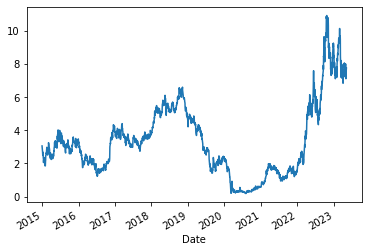

In [16]:
yield_curve["dur_10y"].plot()